# Estimate the age of an abalone?

## 📖 Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## 💪 Challenge
Create a report that covers the following:

1. How does weight change with age for each of the three sex categories?
2. Can you estimate an abalone's age using its physical characteristics? 

## 💾 The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

abalone = pd.read_csv('./data/abalone.csv')
abalone

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


# 1. How does weight change with age for each of the three sex categories?

Abalones have three gender categories :
- **Male (M)**
- **Female (F)**
- **Infant (I)**

To analyze the relation betweeen the weight of abalones with respect to their ages of each gender categories, first we need to extract out all the abalones by their gender and then filtering out the obtained into their specific genders.

### For Male Abalones 🦪

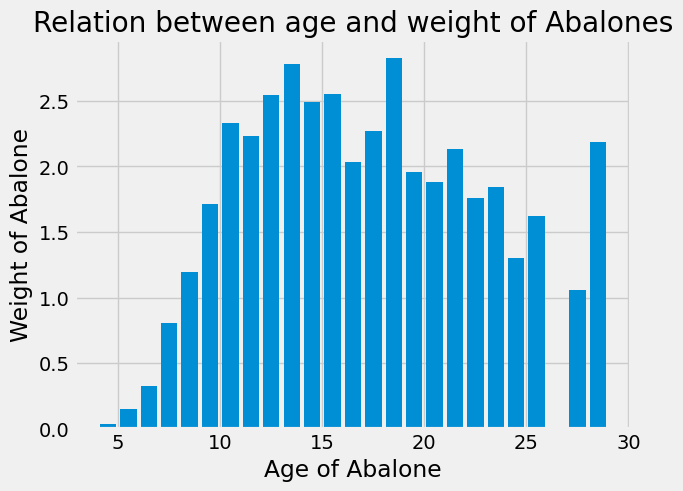

In [12]:
# Extracting age and whole weight of abalones by different sex
total_abalone = abalone.sort_values('age').groupby('sex')[['age', 'whole_wt']]

# For male abalones
male_abalone = total_abalone.get_group('M')

# Scatter plot for male abalone
plt.bar(male_abalone['age'], male_abalone['whole_wt'])
plt.title('Relation between age and weight of Abalones')
plt.xlabel('Age of Abalone')
plt.ylabel('Weight of Abalone')
    
# Show the plot
plt.show()


### INFERENCE: 
The bar plot shows that, 
- **The male abalones ranging from age 18 - 20 weigh highest than all.**
- **Between the age range 5 - 10, abalones have least weight as they were all baby abalones.**
- **Between the age range 13 - 15, abalones have the desired weight for the abalones.**
- **After age 20, their weight declines making them not fit for use.**

### For Female Abalones 🦪

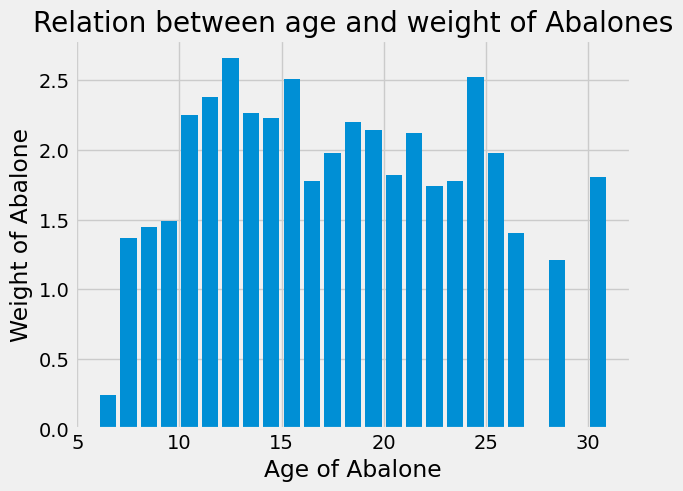

In [13]:
# For female abalones
female_abalone = total_abalone.get_group('F')

# Scatter plot for male abalone
plt.bar(female_abalone['age'], female_abalone['whole_wt'])
plt.title('Relation between age and weight of Abalones')
plt.xlabel('Age of Abalone')
plt.ylabel('Weight of Abalone')
    
# Show the plot
plt.show()

### INFERENCE: 
The bar plot shows that, 
- **The female abalones ranging from age 12 - 15 weigh highest than all.**
- **Between the age range 5 - 10, abalones have least weight as they were all baby abalones.**
- **Between the age range 15 - 24, abalones have the desired weight for use.**
- **After age 25, their weight declines making them not fit for use.**

### For Infant Abalones 🦪

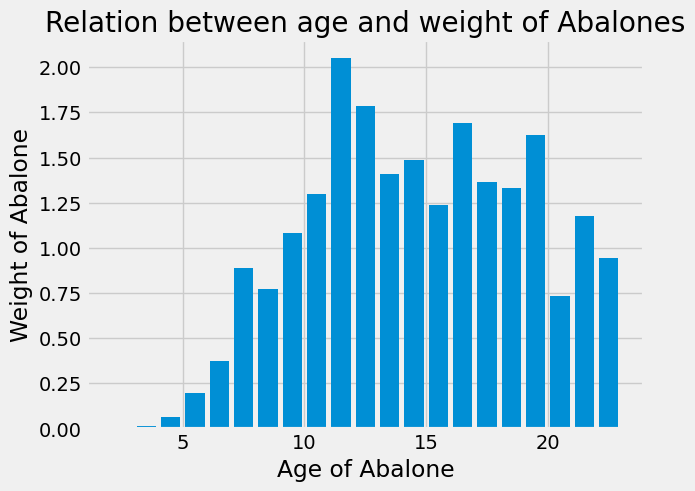

In [14]:
# For infant abalones
infant_abalone = total_abalone.get_group('I')

# Scatter plot for male abalone
plt.bar(infant_abalone['age'], infant_abalone['whole_wt'])
plt.title('Relation between age and weight of Abalones')
plt.xlabel('Age of Abalone')
plt.ylabel('Weight of Abalone')
    
# Show the plot
plt.show()

### INFERENCE: 
The bar plot shows that, 
- **The infant abalones ranging from age 12 - 13 weigh highest than all.**
- **Between the age range 5 - 10, abalones have least weight as they were all baby abalones.**
- **Between the age range 14 - 20, abalones have the desired weight for use.**
- **After age 20, their weight has a major fall making them not fit for use.**

## Relation between age and weight of Abalones irrespective of age

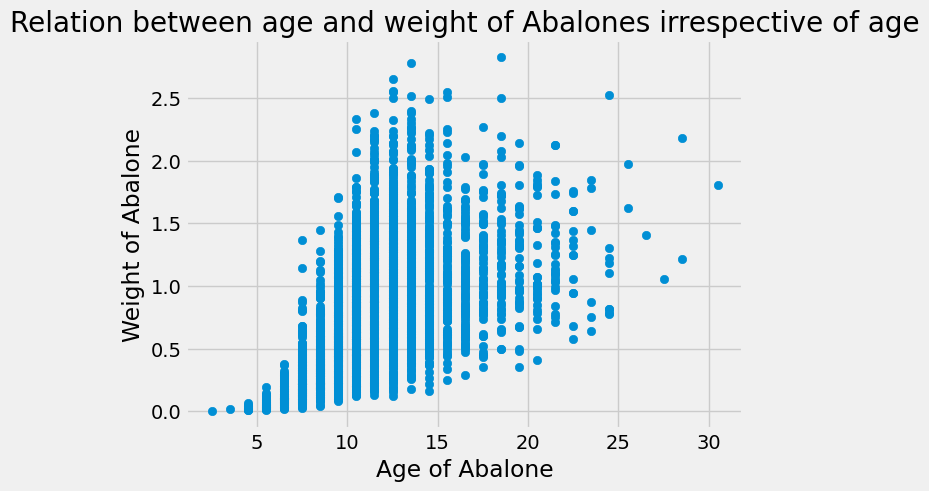

In [15]:
plt.scatter(abalone['age'], abalone['whole_wt'])
plt.title('Relation between age and weight of Abalones irrespective of age')
plt.xlabel('Age of Abalone')
plt.ylabel('Weight of Abalone')
plt.show()

### CONCLUSION: 
From the scatter plot we can infer that,  
- **Between the age range of 0 - 10, the weights of abalones increase, making them present in their growth stage.**
So, the divers who catch them should have a proper knowledge about their age, appearance of the abalones, so they could judge each jewels of the ocean and leave them to grow until their harvest.
- **Between the age range 11 - 20, the weights of abalones are just perfect for use.**
So, divers should harvest these age range abalones as fast they could to help in production of amazing culinary experience to the people.
- **After age 20, their weight fluctuates a lot and also face a drastic fall making them not fit for use.**
People who are buying or consuming abalones should also have adequate knowledge about the abalones their age, wight, color, texture so they would know what they are consuming and how fresh is that piece of the ocean.

# 2. Can you estimate an abalone's age using its physical characteristics? 

The two physical characteristics which can be utilised to estimate the age of abalone is:
1. Number of rings
2. Shell size of abalone

**NUMBER OF RINGS**

As the age of abalone and rings present in abalone directly linked to each other, so we can estimate their perfect age from rings only.

In [16]:
age_of_abalone = abalone[['sex', 'rings']]

age = abalone['rings'] + 1.5
age_of_abalone['age'] = age

age_of_abalone

,sex,rings,age
0,M,15,16.5
1,M,7,8.5
2,F,9,10.5
3,M,10,11.5
4,I,7,8.5
...,...,...,...
4172,F,11,12.5
4173,M,10,11.5
4174,M,9,10.5
4175,F,10,11.5


**Plot for relation between rings of abalone with age**

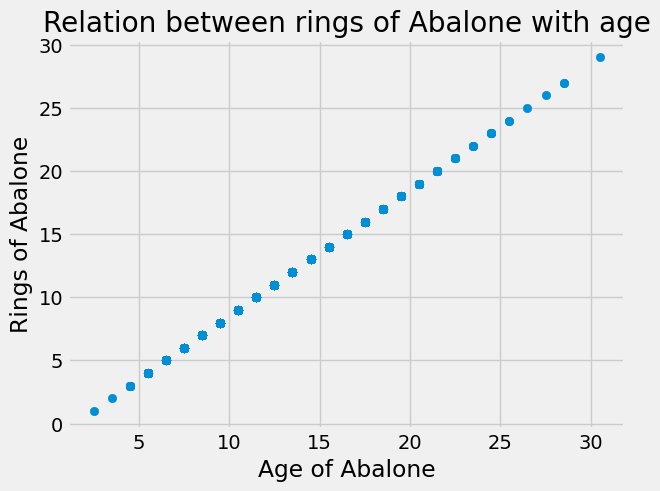

In [17]:
# Creation of plot for the relation of size of shell with age
plt.scatter(age_of_abalone['age'], age_of_abalone['rings'])
plt.title('Relation between rings of Abalone with age')
plt.xlabel('Age of Abalone')
plt.ylabel('Rings of Abalone')
plt.show()

**CONCLUSION:**

From the plot we concluded that, the age of abalone and rings of abalone have a positive relation with each other. Which means, on increase of rings of abalone the age of abalone also increases. It has a linear graph.

And we can easily predict its age by the relation:

**Age of abalone = Number of rings + 1.5**

**SHELL SIZE WITH AGE**

In [18]:
# Physical characteristics of abalone to be studied
char_of_abalone = abalone[['sex','age', 'length', 'diameter', 'height']]

# Create column function
size_of_abalone = abalone['length'] * abalone['diameter'] * abalone['height']

# Adding to the existing dataframe
char_of_abalone['size'] = size_of_abalone

char_of_abalone

,sex,age,length,diameter,height,size
0,M,16.5,0.455,0.365,0.095,0.015777
1,M,8.5,0.350,0.265,0.090,0.008347
2,F,10.5,0.530,0.420,0.135,0.030051
3,M,11.5,0.440,0.365,0.125,0.020075
4,I,8.5,0.330,0.255,0.080,0.006732
...,...,...,...,...,...,...
4172,F,12.5,0.565,0.450,0.165,0.041951
4173,M,11.5,0.590,0.440,0.135,0.035046
4174,M,10.5,0.600,0.475,0.205,0.058425
4175,F,11.5,0.625,0.485,0.150,0.045469


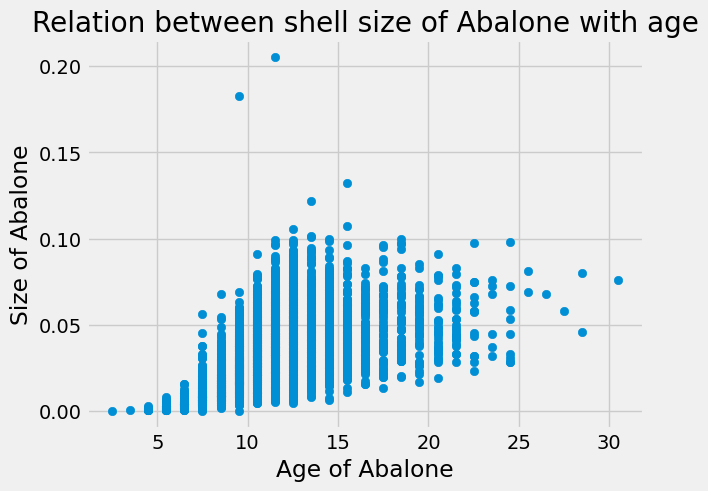

In [19]:
# Creation of plot for the relation of size of shell with age

plt.scatter(char_of_abalone['age'], char_of_abalone['size'])
plt.title('Relation between shell size of Abalone with age')
plt.xlabel('Age of Abalone')
plt.ylabel('Size of Abalone')
plt.show()

**CONCLUSION:**

From the plot we concluded that, 
1. When the size of abalone are smaller they probably in their 5s' or 10s' or 15s' or any other subsequent ages. 
2. When the size of abalones are larger, the ages of abalone are may be in 8 to 30.
3. The abalones weighing most are present in the age range 10 to 12.
**The scatter plot shows, there is no definite relation between the age and size of abalone.**

## ⌛️ Hurrah. It is complete!